# Data Science Project: Enhancing Customer Booking Predictions at British Airways

## Introduction

As a Data Scientist at British Airways, my role involved leveraging analytical skills to provide impactful insights and recommendations that directly influence business strategies. This project takes me through a comprehensive journey, from extracting customer reviews on Skytrax to building a predictive model using the Random Forest algorithm. The project encompasses several steps, including web scraping, data preprocessing, exploratory data analysis, model selection, and evaluation. My contributions contribute to informed decision-making, cost reduction, and revenue growth.

## Web Scraping for Insights

The project kicked off with web scraping customer reviews from the Skytrax platform, a crucial source for understanding customer preferences and behaviors. This data includes the number of passengers, lead time for purchase, length of stay, flight hour, flight day, and customer preferences (extra baggage, preferred seat, in-flight meals, etc.).



- Utilizing Python libraries like `BeautifulSoup` and `requests`, I extracted relevant data from Skytrax.
- The extracted data was structured into a DataFrame, housing details such as flight experiences, ratings, and feedback.

## Data Preprocessing and Feature Engineering

Prior to model creation, the collected data required preprocessing to ensure it was ready for analysis.

- Data preprocessing encompassed tasks like handling missing values and transforming categorical variables.
- Feature engineering involved creating new insights from the raw data, including new features and normalization.

## Exploring Insights through EDA

Exploratory Data Analysis (EDA) involves understanding the data's characteristics and relationships. The code snippet visualizes the data using histograms, scatter plots, and correlation matrices to gain insights into the dataset's structure and patterns.

Exploratory Data Analysis (EDA) was pivotal for uncovering patterns within the data and guiding subsequent steps.

- Leveraging visualizations and statistical methods, I identified trends, correlations, and potential outliers.
- The insights gathered through EDA guided feature selection and influenced the model-building process.

## Constructing the Predictive Model: Random Forest

The project employs a Random Forest classifier for predicting customer booking completion. The code defines a Random Forest model with specific hyperparameters. The model is trained on the training data using the `fit` method and evaluated using various metrics, including accuracy, precision, recall, and F1-score. The confusion matrix is visualized using the `ConfusionMatrix` visualizer from the `yellowbrick` library.

Enhancing customer booking predictions was achieved through the creation of a Random Forest classification model.

- The dataset was divided into training and testing sets via `train_test_split`.
- Hyperparameter tuning was conducted for the Random Forest classifier, employing techniques like GridSearchCV and cross-validation.
- Model performance was assessed using metrics such as accuracy, precision, recall, and F1-score.

## Feature Importance

Feature importance is determined to understand which features contribute the most to the model's predictions. The code snippet creates horizontal bar charts illustrating the importance of each feature in the Random Forest model's decision-making process.

## Addressing Class Imbalance


To address the class imbalance issue (more non-completed bookings compared to completed ones), the code creates a balanced dataset by oversampling the minority class. The Random Forest model is retrained on this balanced dataset.

The project addressed class imbalance, a common challenge in classification tasks.

- To rectify class imbalance, the minority class was oversampled to balance class distribution.
- The Random Forest model was retrained on the balanced dataset to improve its predictive capabilities.

## Influence on Business Decisions

As a Data Scientist at British Airways, my work profoundly shaped business strategies and outcomes:

- **Strategic Influence:** Insights derived from customer reviews and predictive models drove customer-centric strategies, enhancing overall experience and customer loyalty.
- **Cost-Efficiency:** Accurate predictions optimized resource allocation, minimizing costs related to underutilization or overbooking.
- **Revenue Enhancement:** Improved booking predictions enabled personalized offers, attracting more customers and driving revenue growth.

## Conclusion

This project underscored my role as a proficient Data Scientist at British Airways, wherein my analytical prowess drove significant contributions to pivotal business decisions. From web scraping to Random Forest modeling, my work directly bolstered the airline's achievements, cementing my position as a crucial asset within the company's data-driven approach.


In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
# Define the URL to scrape
# url = "https://www.airlinequality.com/"

# Send a request and parse the HTML content
# result = requests.get(url)
# doc = BeautifulSoup(result.text, "html.parser")
# print(doc.prettify())

In [2]:
#create an empty list to collect all reviews 
reviews = []
#create an empty list to collect rating stars
stars = []
#create an empty list to collect date
date = []
#create an empty list to collect country the reviewer is from
country = []

In [3]:
# Loop through pages to gather review information
for i in range(1, 36):
     # Get the page content
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    soup = BeautifulSoup(page.content, "html5")
    
     # Extract review text
    for item in soup.find_all("div", class_ = "text_content"):
        reviews.append(item.text)

    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print (f"Error on page {i}")
            stars.append(None)
   # Extract dates
    for item in soup.find_all("time"):
        date.append(item.text)

     # Extract countries
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 31
Error on page 32
Error on page 32
Error on page 35
Error on page 35


In [4]:
len(reviews) 

3500

In [5]:
len(country)

3500

In [6]:
# Trim the 'stars' list to match the number of reviews
stars = stars[:3500]

In [7]:
len(stars)

3500

In [8]:
# Create a DataFrame from the collected data
df = pd.DataFrame({"reviews" :reviews, "stars": stars, "date":date, "country": country})

In [9]:
df.head()

reviews  \
0  ✅ Trip Verified |  My family and I have flown ...   
1  ✅ Trip Verified |  This has been by far the wo...   
2  ✅ Trip Verified |  In Nov 2022 I booked and pa...   
3  Not Verified | BA is not treating its premium ...   
4  ✅ Trip Verified |  24 hours before our departu...   

                           stars           date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  9th July 2023  United Kingdom  
1                              4  9th July 2023   United States  
2                              2  8th July 2023  United Kingdom  
3                              2  6th July 2023  United Kingdom  
4                              4  5th July 2023    South Africa

In [10]:
df.shape

(3500, 4)

In [11]:
import os


cwd = os.getcwd()

# Save the DataFrame to a CSV file
df.to_csv(cwd+ "/BA_reviews.csv")

In [12]:
# Import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#regex
import re
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)


In [13]:
df.head()

reviews  stars           date  \
0  ✅ Trip Verified |  My family and I have flown ...    5.0  9th July 2023   
1  ✅ Trip Verified |  This has been by far the wo...    4.0  9th July 2023   
2  ✅ Trip Verified |  In Nov 2022 I booked and pa...    2.0  8th July 2023   
3  Not Verified | BA is not treating its premium ...    2.0  6th July 2023   
4  ✅ Trip Verified |  24 hours before our departu...    4.0  5th July 2023   

          country  
0  United Kingdom  
1   United States  
2  United Kingdom  
3  United Kingdom  
4    South Africa

In [ ]:
# Extract whether reviews are verified or not

In [14]:
df['verified'] = df.reviews.str.contains("Trip Verified")
df['verified']

0        True
1        True
2        True
3       False
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [15]:
# Import NLTK libraries for text preprocessing
#for lemmatization of words we will use nltk library
# Initialize lemmatizer and stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev) # Remove non-alphabetic characters
    rev = rev.lower() # Convert to lowercase
    rev = rev.split() # Convert to lowercase
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]  # Lemmatize and remove stopwords
    rev = " ".join(rev)  # Join words back
    rev = " ".join(rev)
    corpus.append(rev)

In [16]:
# Add the cleaned corpus to the DataFrame
df['corpus'] = corpus

df.head()

reviews  stars           date  \
0  ✅ Trip Verified |  My family and I have flown ...    5.0  9th July 2023   
1  ✅ Trip Verified |  This has been by far the wo...    4.0  9th July 2023   
2  ✅ Trip Verified |  In Nov 2022 I booked and pa...    2.0  8th July 2023   
3  Not Verified | BA is not treating its premium ...    2.0  6th July 2023   
4  ✅ Trip Verified |  24 hours before our departu...    4.0  5th July 2023   

          country  verified                                             corpus  
0  United Kingdom      True  family flown mostly british airway last year p...  
1   United States      True  far worst service plane obvious flying economy...  
2  United Kingdom      True  nov booked paid return journey new zealand ret...  
3  United Kingdom     False  verified ba treating premium economy passenger...  
4    South Africa      True  hour departure ba cape town heathrow thursday ...

In [17]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [18]:
# Convert 'date' column to datetime format
df.date = pd.to_datetime(df.date)

In [19]:
df['stars'].unique()

array([ 5.,  4.,  2.,  1.,  3., 10.,  7.,  9.,  8.,  6., nan])

In [20]:
df.stars.value_counts()

1.0     796
2.0     399
3.0     393
8.0     347
10.0    299
7.0     297
9.0     295
5.0     252
4.0     240
6.0     177
Name: stars, dtype: int64

In [21]:
# df.drop(df.stars.isnull().index, axis=0, inplace=True)

In [22]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3493
         True   False  False    False     False        5
         False  False  True     False     False        2
dtype: int64

In [23]:
df.country.isnull().value_counts()

False    3498
True        2
Name: country, dtype: int64

In [24]:
df

reviews  stars       date  \
0     ✅ Trip Verified |  My family and I have flown ...    5.0 2023-07-09   
1     ✅ Trip Verified |  This has been by far the wo...    4.0 2023-07-09   
2     ✅ Trip Verified |  In Nov 2022 I booked and pa...    2.0 2023-07-08   
3     Not Verified | BA is not treating its premium ...    2.0 2023-07-06   
4     ✅ Trip Verified |  24 hours before our departu...    4.0 2023-07-05   
...                                                 ...    ...        ...   
3495  BA 213 LHR to Boston. T5 was very busy but che...    5.0 2014-06-12   
3496  Flew World Traveller Plus for the first time. ...    4.0 2014-06-12   
3497  Glasgow to LHR on a completely full flight. Th...    7.0 2014-06-12   
3498  LHR-CPH-LHR both A320s. Other than bussed to s...   10.0 2014-06-12   
3499  Rome Fiumicino - LHR Jun 1st Economy Airbus 32...    6.0 2014-06-12   

             country  verified  \
0     United Kingdom      True   
1      United States      True   
2     United Kingdom      True   
3     United Kingdom     False   
4       South Africa      True   
...              ...       ...   
3495  United Kingdom     False   
3496          Canada     False   
3497  United Kingdom     False   
3498  United Kingdom     False   
3499  United Kingdom     False   

                                                 corpus  
0     family flown mostly british airway last year p...  
1     far worst service plane obvious flying economy...  
2     nov booked paid return journey new zealand ret...  
3     verified ba treating premium economy passenger...  
4     hour departure ba cape town heathrow thursday ...  
...                                                 ...  
3495  ba lhr boston busy check fast efficient flight...  
3496  flew world traveller plus first time trip lhr ...  
3497  glasgow lhr completely full flight crew amazin...  
3498  lhr cph lhr bussed stand outward good bus unex...  
3499  rome fiumicino lhr jun st economy airbus great...  

[3500 rows x 6 columns]

In [25]:
# Save cleaned DataFrame to CSV
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

In [26]:
# Import necessary libraries for data visualization
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [27]:
# Load the cleaned DataFrame
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [28]:
df.tail()

reviews  stars        date  \
3495  BA 213 LHR to Boston. T5 was very busy but che...    5.0  2014-06-12   
3496  Flew World Traveller Plus for the first time. ...    4.0  2014-06-12   
3497  Glasgow to LHR on a completely full flight. Th...    7.0  2014-06-12   
3498  LHR-CPH-LHR both A320s. Other than bussed to s...   10.0  2014-06-12   
3499  Rome Fiumicino - LHR Jun 1st Economy Airbus 32...    6.0  2014-06-12   

             country  verified  \
3495  United Kingdom     False   
3496          Canada     False   
3497  United Kingdom     False   
3498  United Kingdom     False   
3499  United Kingdom     False   

                                                 corpus  
3495  ba lhr boston busy check fast efficient flight...  
3496  flew world traveller plus first time trip lhr ...  
3497  glasgow lhr completely full flight crew amazin...  
3498  lhr cph lhr bussed stand outward good bus unex...  
3499  rome fiumicino lhr jun st economy airbus great...

In [29]:
# Calculate the mean star rating
df.stars.mean()

4.736766809728183

Text(0.5, 0.98, 'Counts for each ratings')

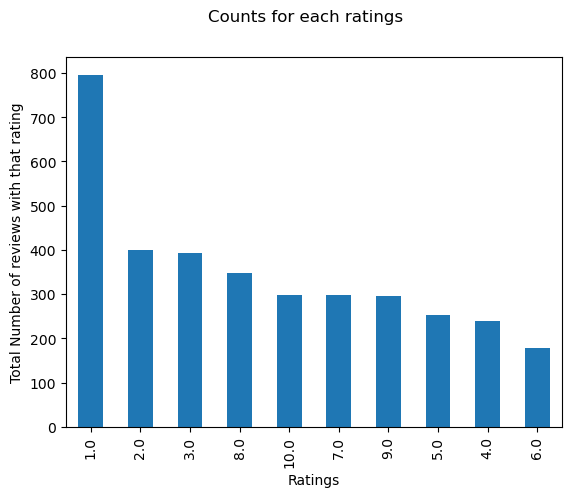

In [30]:
# Create a bar plot for star ratings
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [31]:
# Calculate the percentage of each star rating
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values


In [32]:
df_ratings = df_ratings.reset_index()

In [33]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [34]:
df_ratings

Stars  total_counts  pct_values
0    1.0           796       22.78
1    2.0           399       11.42
2    3.0           393       11.24
3    8.0           347        9.93
4   10.0           299        8.56
5    7.0           297        8.50
6    9.0           295        8.44
7    5.0           252        7.21
8    4.0           240        6.87
9    6.0           177        5.06

Text(0.5, 1.0, 'Counts for each ratings')

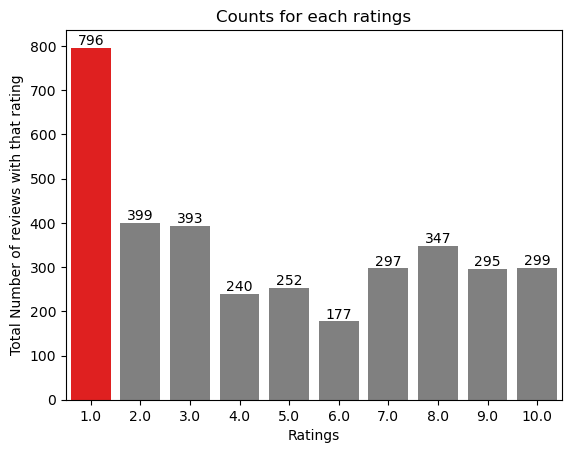

In [35]:
# Create a bar plot for star ratings with percentage labels
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [36]:
# Calculate the number of unique countries
print(f"{len(df.country.unique())} unique countries")

70 unique countries


Text(0.5, 1.0, 'Maximum number of review by country')

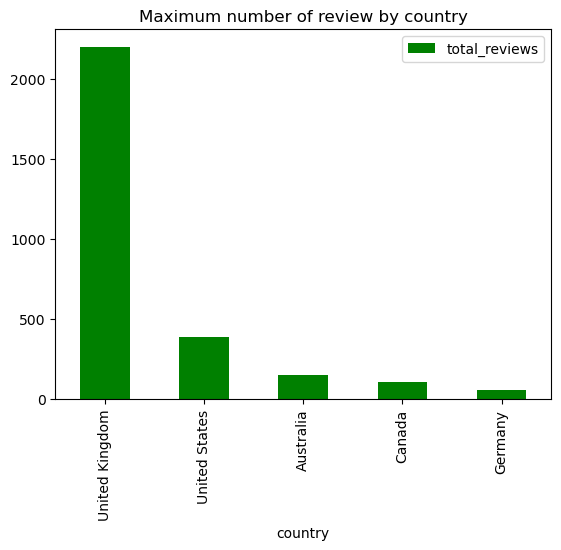

In [37]:
# Create a bar plot for maximum number of reviews by country
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
df_country_review.plot(kind="bar", x='country', color = 'Green')
plt.title("Maximum number of review by country")

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

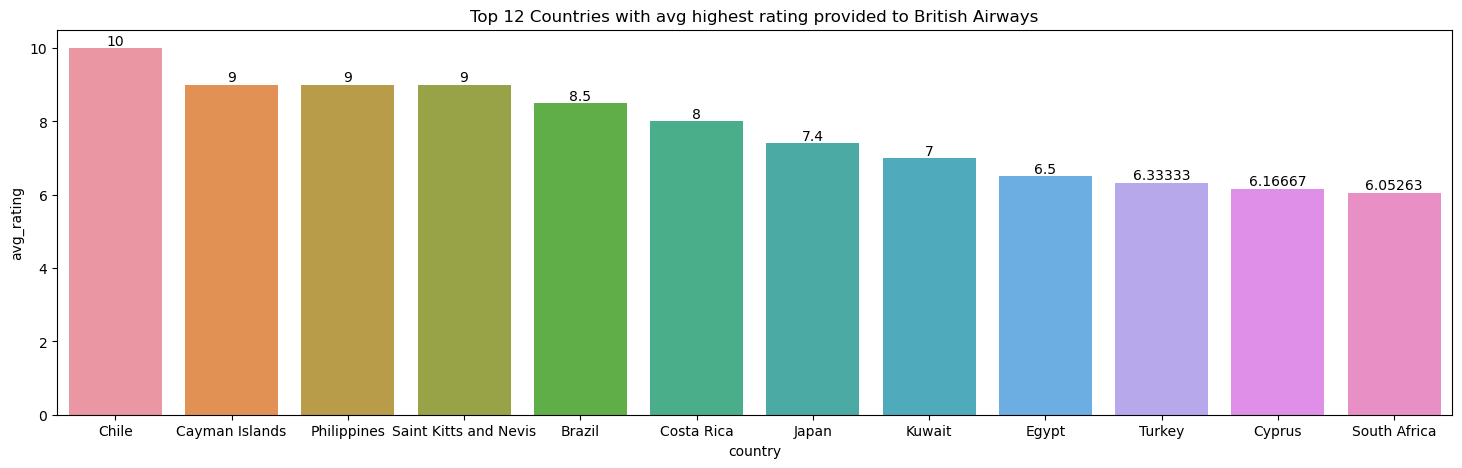

In [38]:
# Create a bar plot for average ratings by top countries
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

In [39]:
# Create a line plot for star ratings over time
df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

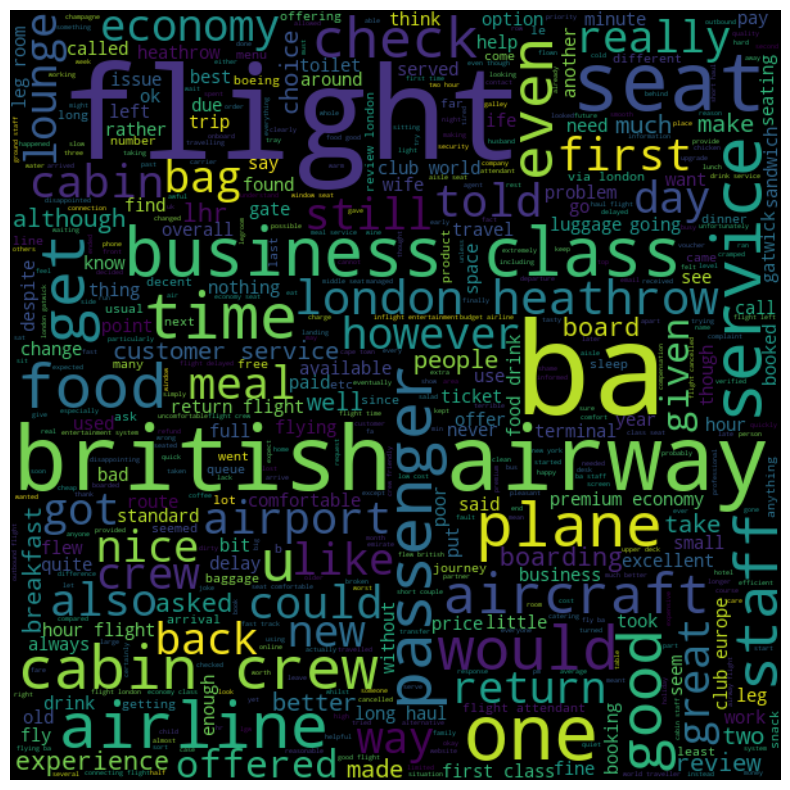

In [40]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

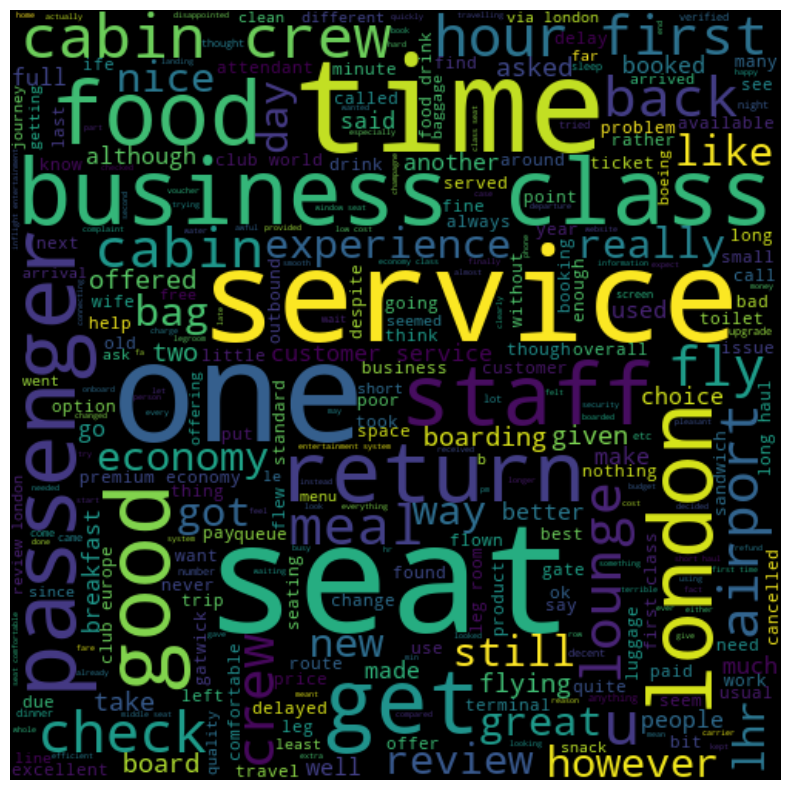

In [41]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# Import necessary libraries for text analysis
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
# Create a list of words from the reviews
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
# Define custom stopwords
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])

# Remove stopwords and create a new list of words
new_words = [word for word in words if word not in stopwords]

# Calculate and plot the frequency distribution of individual words
nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

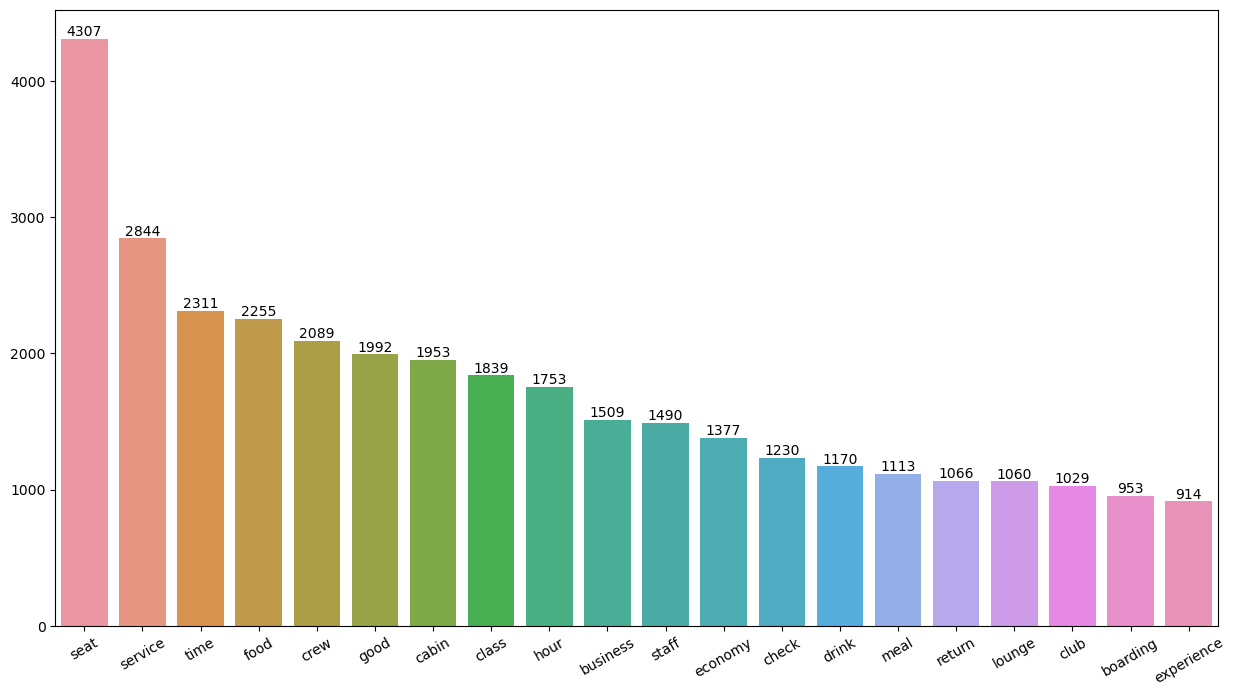

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<AxesSubplot:>

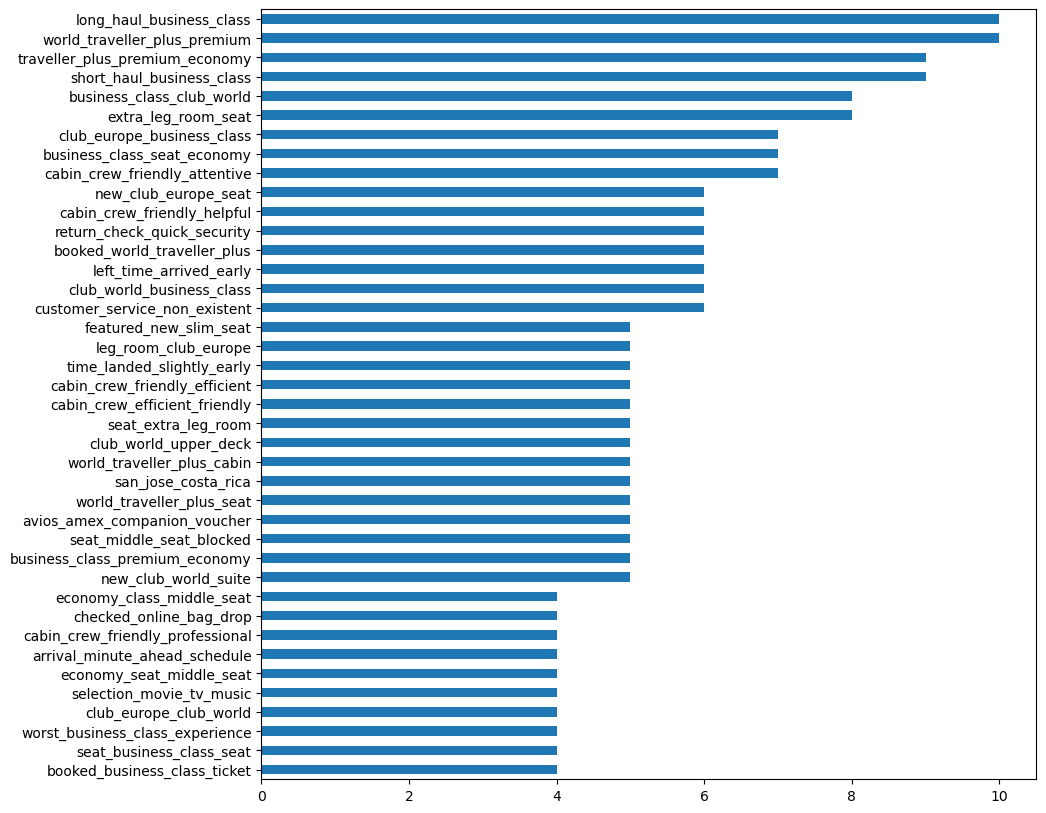

In [44]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]


# Function to get frequency distribution of n-grams
def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

# Plot frequency distribution of 4-grams for neutral reviews
get_freq_dist(new_words,4)

<AxesSubplot:>

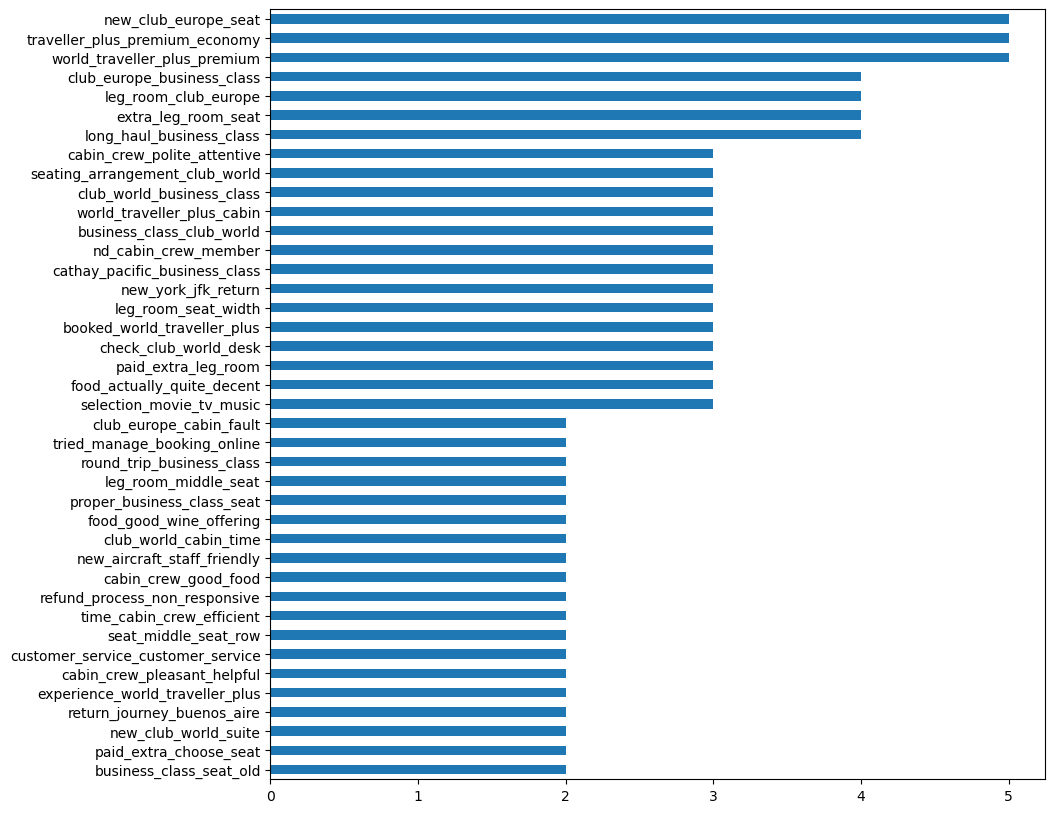

In [45]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

# Plot frequency distribution of 4-grams for positive reviews
get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

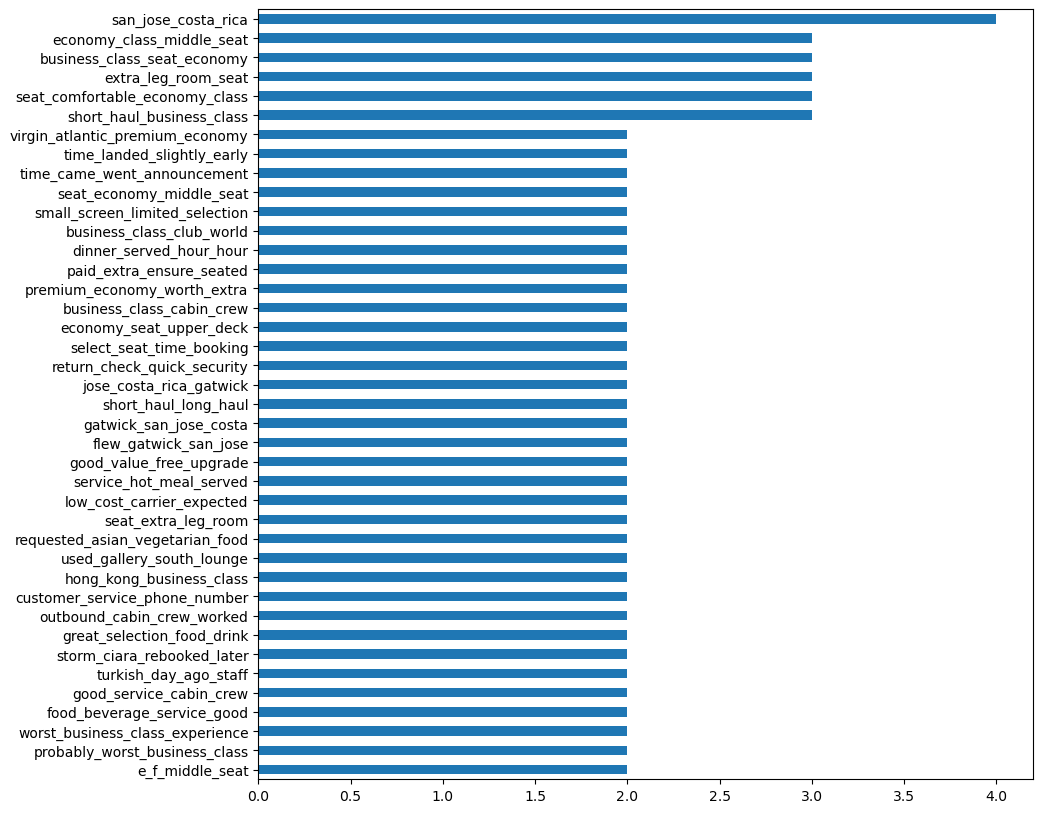

In [46]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

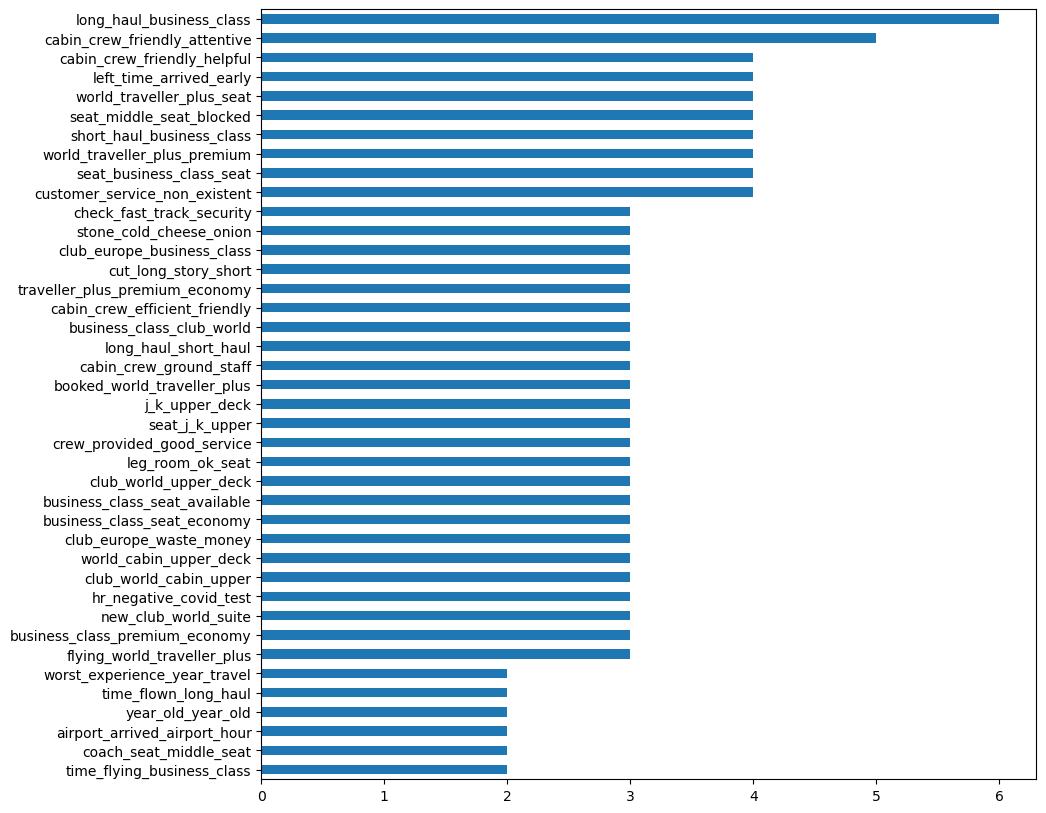

In [47]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [48]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [49]:
# Calculate the number of reviews with polarity scores between -0.2 and 0.2
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2361 number of reviews between -0.2 and 0.2 polarity score
1370 number of reviews between -0.1 and 0.1 polarity score


In [50]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# Perform sentiment analysis using VADER
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [51]:
df.label.value_counts()

 1    2250
-1    1129
 0     121
Name: label, dtype: int64

In [52]:
# Capture any output from the code execution
%%capture

# Import the required libraries for topic modeling and text analysis
from sklearn.feature_extraction.text import CountVectorizer

## Create a CountVectorizer object to convert text data into term frequency matrix
vect = CountVectorizer()

# Apply transformation to the corpus using the CountVectorizer
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()
from sklearn.decomposition import LatentDirichletAllocation

# Declare the number of topics for the Latent Dirichlet Allocation (LDA) model
number_of_topics = 8

# Initialize the LDA model with the specified number of topics
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the LDA model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

# Loop through the model components to extract topic words and their corresponding weights 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

    # Create a DataFrame to store the extracted topic words and weights
df_topic =pd.DataFrame(topic_dict)
 


In [53]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        flight            53.3         tampa             7.3          meal   
1          crew            49.4           wir             7.1       offered   
2           bag            42.6           cph             6.7         water   
3         cabin            30.9           und             6.1       chicken   
4         plane            28.2       menzies             5.2         drink   
5     passenger            24.0         miami             4.2           tea   
6            ba            24.0            ck             4.1         asked   
7        minute            19.2       marstal             4.1        coffee   
8          trip            18.4      diverted             3.8         pasta   
9           one            18.2        august             3.8        served   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           164.9          seat            62.4        flight          3102.7   
1            86.0          kong            19.3            ba          2041.4   
2            83.0          hong            19.3          seat          1872.1   
3            79.4        person            17.6          good          1773.2   
4            61.5        facing            17.4          food          1590.9   
5            52.5           get            16.9          crew          1506.1   
6            50.8           lhr            14.9       service          1448.6   
7            46.5         child            14.4         cabin          1268.2   
8            44.3        pillow            14.2          time          1209.4   
9            42.9           row            13.7         class          1027.4   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          2012.2          seat           379.1        flight   
1          seat          1943.9            ba           168.1            ba   
2            ba          1479.0        flight           165.3          hour   
3        airway          1156.4           lhr           118.9        london   
4       british          1155.4      boarding           110.4           day   
5       airline          1116.6       economy           108.8          time   
6       service           898.3          gate           107.2          told   
7         class           751.6         check           104.8         would   
8      business           674.1     passenger            92.0       airport   
9        london           649.6         cabin            85.8      customer   

  Topic 7 weights  
0          2096.1  
1           999.9  
2           748.5  
3           563.6  
4           522.8  
5           513.2  
6           510.6  
7           438.3  
8           413.6  
9           412.7

In [54]:

# Import necessary libraries
from sklearn.decomposition import NMF

# Perform NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.12985099, 0.14280418],
       [0.04121674, 0.08537124],
       [0.09233006, 0.        ],
       ...,
       [0.01962959, 0.02997654],
       [0.05433989, 0.03689686],
       [0.00274451, 0.02846199]])

In [55]:
# Initialize an empty dictionary for NMF topics
topic_dict = {}

# Loop through NMF components to extract words and weights for each topic 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
# Create a DataFrame to store NMF topic words and weights    
df_topic =pd.DataFrame(topic_dict)


In [56]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            34.7          seat            14.1
1            ba            11.7            ba             7.5
2          hour             7.7         class             6.1
3          time             6.7          food             4.9
4        london             6.1      business             4.7
5       service             5.8       service             4.7
6        airway             5.6         cabin             4.5
7       british             5.6          good             4.2
8         would             5.0          crew             4.1
9       airline             4.4       economy             3.8

In [57]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [58]:
# Read the CSV file 'customer_booking.csv' into a DataFrame called 'df'
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [59]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [60]:
# Perform basic data exploration
df.shape

(50000, 14)

In [61]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [63]:

per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


In [64]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")

Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

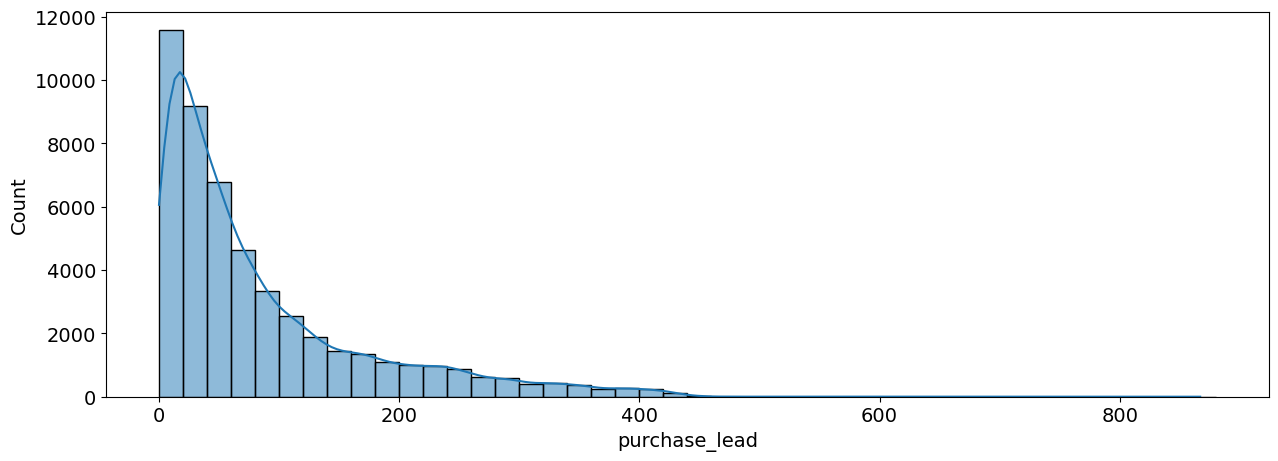

In [65]:
# Plot a histogram for the 'purchase_lead' variable
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [66]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [67]:
df[df.purchase_lead > 600]

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
835                 3      Internet  RoundTrip            641              46   
6148                1      Internet  RoundTrip            614              19   
24119               1      Internet  RoundTrip            704              23   
38356               2      Internet  RoundTrip            633               5   
39417               1        Mobile  RoundTrip            625               5   
42916               1        Mobile  RoundTrip            605               6   
46716               2      Internet  RoundTrip            606               6   
48259               3      Internet  RoundTrip            867               6   

       flight_hour flight_day   route   booking_origin  wants_extra_baggage  \
835              6        Sun  AKLKUL         Malaysia                    1   
6148            11        Wed  COKMEL        Australia                    0   
24119            8        Tue  PNHSYD        Australia                    0   
38356           10        Sat  HKTOOL        Australia                    0   
39417           15        Fri  ICNRGN  Myanmar (Burma)                    0   
42916           18        Thu  BLRMEL            India                    0   
46716            6        Fri  HKTTPE    United States                    0   
48259            7        Mon  KIXMLE            Japan                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
835                       0                      1             8.83   
6148                      0                      0             8.83   
24119                     0                      0             8.58   
38356                     0                      1             8.83   
39417                     0                      0             6.62   
42916                     0                      0             8.83   
46716                     0                      1             4.67   
48259                     0                      1             7.00   

       booking_complete  
835                   1  
6148                  0  
24119                 0  
38356                 0  
39417                 0  
42916                 0  
46716                 0  
48259                 1

In [68]:
df = df[df.purchase_lead <600 ]

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

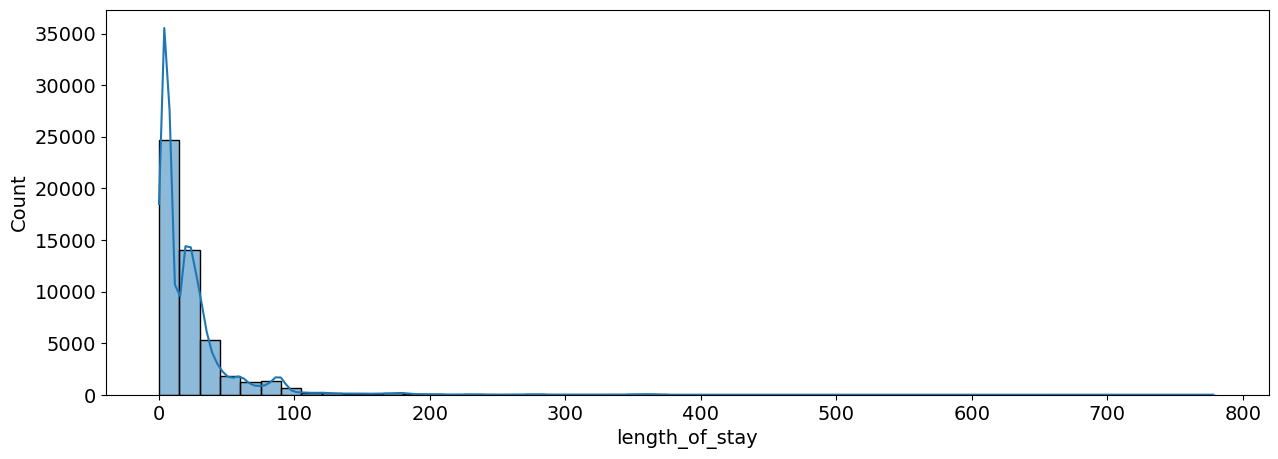

In [69]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [70]:
(df.length_of_stay> 200).value_counts()

False    49713
True       279
Name: length_of_stay, dtype: int64

In [71]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [72]:
df = df[df.purchase_lead <500 ]

In [73]:
mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)
df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Text(0, 0.5, 'Number of bookings')

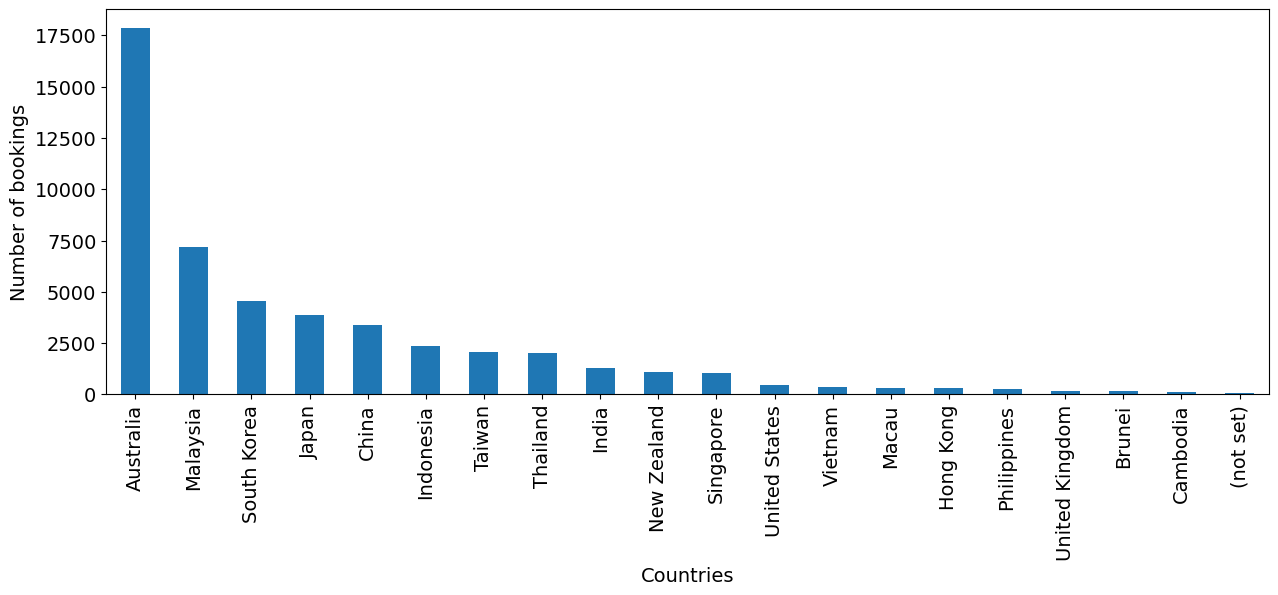

In [74]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

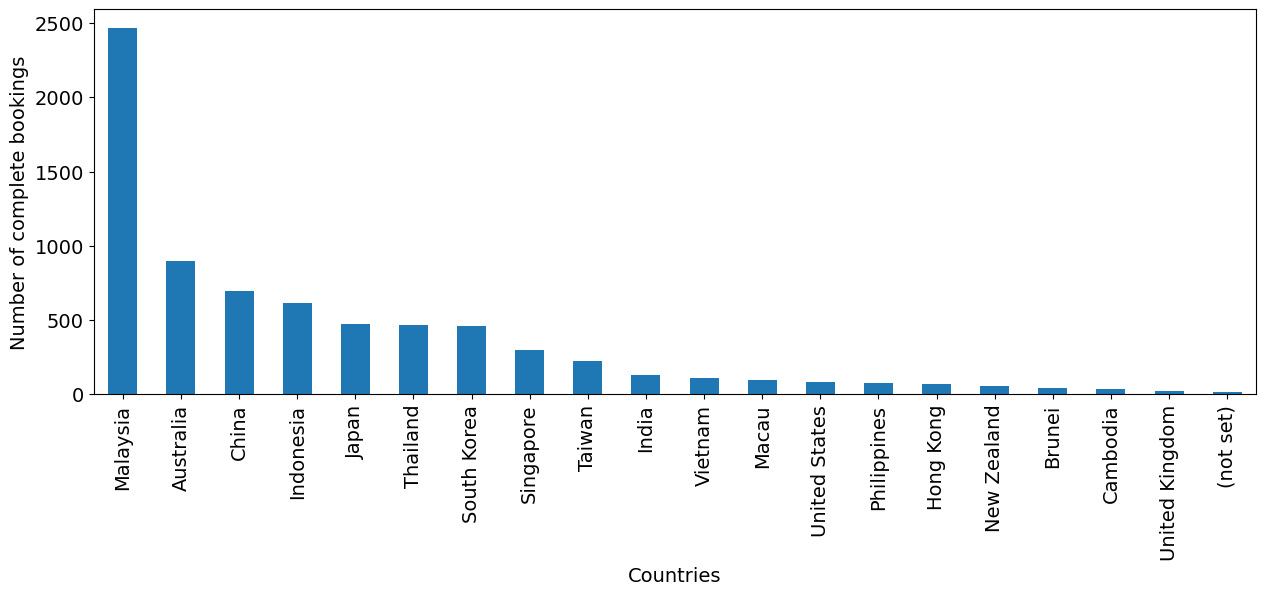

In [75]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [76]:
# Calculate the percentage of successful and unsuccessful bookings
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccessful_booking_per = 100-successful_booking_per

In [77]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [78]:
# Save the filtered and processed DataFrame to a new CSV file
df.to_csv("filtered_customer_booking.csv")

In [79]:
df = pd.read_csv("filtered_customer_booking.csv", index_col=0)

In [80]:
df = df.reset_index(drop=True)

In [81]:
df

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49977               2      Internet  RoundTrip             27               6   
49978               1      Internet  RoundTrip            111               6   
49979               1      Internet  RoundTrip             24               6   
49980               1      Internet  RoundTrip             15               6   
49981               1      Internet  RoundTrip             19               6   

       flight_hour  flight_day   route booking_origin  wants_extra_baggage  \
0                7           6  AKLDEL    New Zealand                    1   
1                3           6  AKLDEL    New Zealand                    0   
2               17           3  AKLDEL          India                    1   
3                4           6  AKLDEL    New Zealand                    0   
4               15           3  AKLDEL          India                    1   
...            ...         ...     ...            ...                  ...   
49977            9           6  PERPNH      Australia                    1   
49978            4           7  PERPNH      Australia                    0   
49979           22           6  PERPNH      Australia                    0   
49980           11           1  PERPNH      Australia                    1   
49981           10           4  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49977                     0                      1             5.62   
49978                     0                      0             5.62   
49979                     0                      1             5.62   
49980                     0                      1             5.62   
49981                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49977                 0  
49978                 0  
49979                 0  
49980                 0  
49981                 0  

[49982 rows x 14 columns]

In [82]:
df_final = df

In [83]:
# Import necessary libraries for data preprocessing and scaling
from sklearn.preprocessing import OneHotEncoder


# Create an instance of OneHotEncoder for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')

# One hot encode the 'sales_channel' feature
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

# One hot encode the 'trip_type' featuree
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [84]:
# Drop categorical columns from the DataFrame
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [85]:
# Store the 'booking_complete' column as the label for supervised learning
label = df['booking_complete']

In [86]:

# Drop the 'booking_complete' column from the DataFrame
df_final = df_final.drop('booking_complete', axis=1)
df_final

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49977               2             27               6            9           6   
49978               1            111               6            4           7   
49979               1             24               6           22           6   
49980               1             15               6           11           1   
49981               1             19               6           10           4   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                        0                     0                      0   
2                        1                     1                      0   
3                        0                     0                      1   
4                        1                     0                      1   
...                    ...                   ...                    ...   
49977                    1                     0                      1   
49978                    0                     0                      0   
49979                    0                     0                      1   
49980                    1                     0                      1   
49981                    0                     1                      0   

       flight_duration  Internet  Mobile  RoundTRip  OneWayTrip  CircleTrip  
0                 5.52       1.0     0.0        0.0         0.0         1.0  
1                 5.52       1.0     0.0        0.0         0.0         1.0  
2                 5.52       1.0     0.0        0.0         0.0         1.0  
3                 5.52       1.0     0.0        0.0         0.0         1.0  
4                 5.52       1.0     0.0        0.0         0.0         1.0  
...                ...       ...     ...        ...         ...         ...  
49977             5.62       1.0     0.0        0.0         0.0         1.0  
49978             5.62       1.0     0.0        0.0         0.0         1.0  
49979             5.62       1.0     0.0        0.0         0.0         1.0  
49980             5.62       1.0     0.0        0.0         0.0         1.0  
49981             5.62       1.0     0.0        0.0         0.0         1.0  

[49982 rows x 14 columns]

In [87]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [88]:
# Convert scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [89]:
# Add the 'booking_complete' label back to the DataFrame
scaled_df['label']  = label

In [90]:
scaled_df

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0            0.400769       1.971093       -0.119401    -0.381588    1.096876   
1           -0.579424       0.302987       -0.089895    -1.120618    1.096876   
2            0.400769       1.759799       -0.030885     1.465988   -0.408618   
3           -0.579424       0.125056        0.234662    -0.935861    1.096876   
4            0.400769      -0.186323       -0.030885     1.096473   -0.408618   
...               ...            ...             ...          ...         ...   
49977        0.400769      -0.642272       -0.502969    -0.012073    1.096876   
49978       -0.579424       0.291867       -0.502969    -0.935861    1.598707   
49979       -0.579424      -0.675634       -0.502969     2.389776    1.096876   
49980       -0.579424      -0.775721       -0.502969     0.357443   -1.412280   
49981       -0.579424      -0.731238       -0.502969     0.172685    0.093214   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054              -0.863557   
1                -1.421288             -0.650054              -0.863557   
2                 0.703587              1.538334              -0.863557   
3                -1.421288             -0.650054               1.158002   
4                 0.703587             -0.650054               1.158002   
...                    ...                   ...                    ...   
49977             0.703587             -0.650054               1.158002   
49978            -1.421288             -0.650054              -0.863557   
49979            -1.421288             -0.650054               1.158002   
49980             0.703587             -0.650054               1.158002   
49981            -1.421288              1.538334              -0.863557   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4            -1.174049  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
49977        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49978        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49979        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49980        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
49981        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49977      0  
49978      0  
49979      0  
49980      0  
49981      0  

[49982 rows x 15 columns]

<AxesSubplot:>

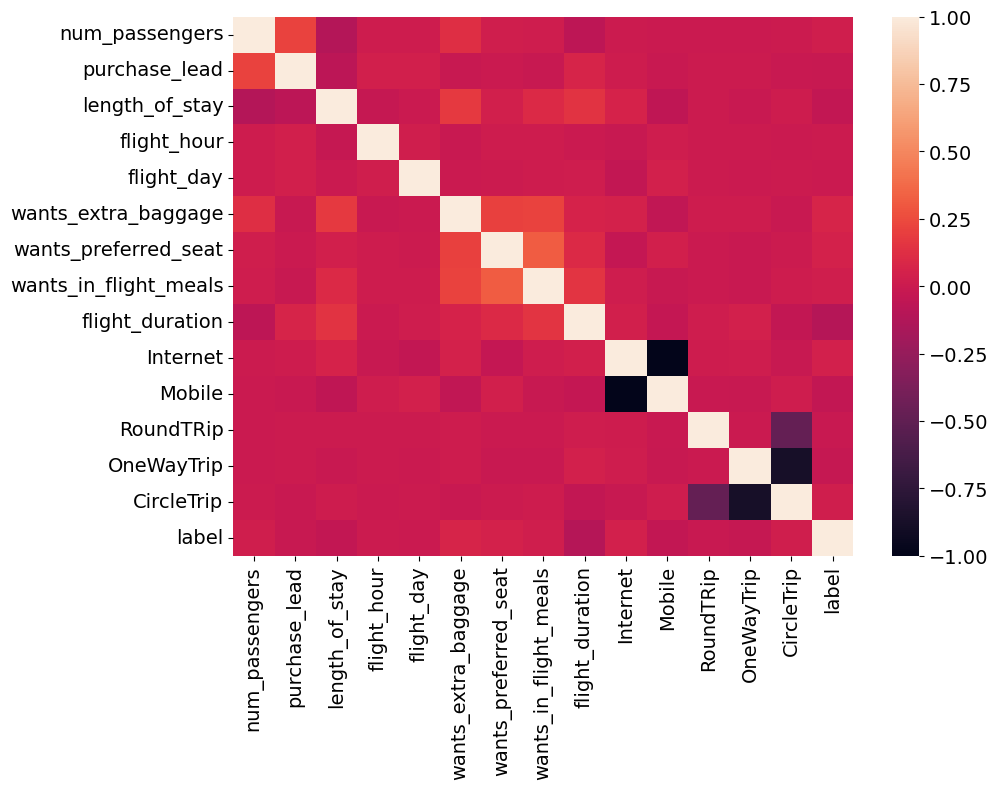

In [91]:
# Calculate the correlation matrix
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

# Plot a heatmap to visualize correlations
sns.heatmap(corr)

In [92]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate features and labels
X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [93]:
# Import required libraries for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [94]:
"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

# Define functions for model fitting, prediction, and evaluation
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [95]:
# Create an instance of the RandomForestClassifier and set hyperparameters
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [96]:
# Fit the training data to the model and predict on training data
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

# Calculate F1, accuracy, and precision scores for training data
#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

# Print the evaluation metrics for training data
print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

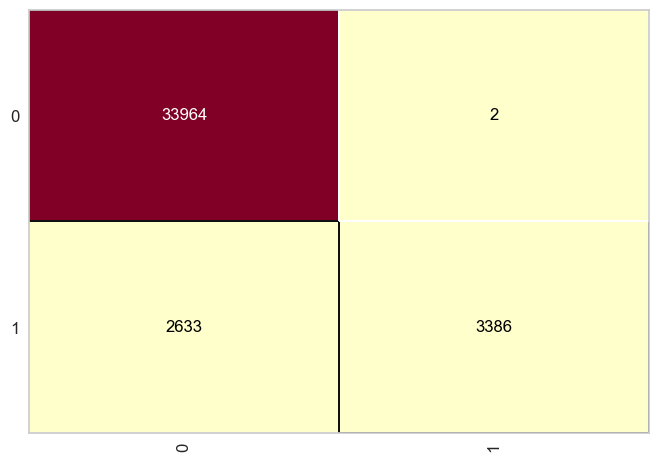

In [97]:
# Create a ConfusionMatrix visualizer for the Random Forest classifier on training data
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [98]:
# Create an instance of the RandomForestClassifier and set hyperparameters
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

# Fit the training data to the model and predict on test data
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Calculate F1, accuracy, precision, recall, and specificity scores for test data
#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

# Print the evaluation metrics for test data
print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

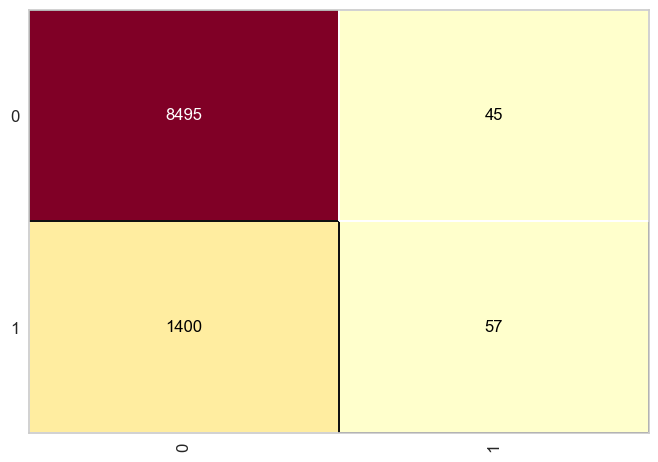

In [99]:
# Create a ConfusionMatrix visualizer for the Random Forest classifier on test data
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

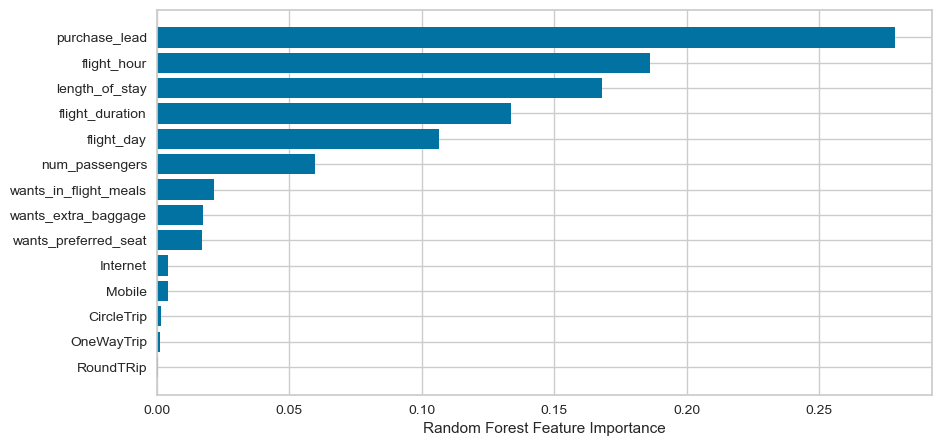

In [100]:
# Plot feature importances from the Random Forest model
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [101]:
# Display the class distribution of the target variable
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [102]:
# Create a new dataframe with balanced class distribution
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)
scaled_df_new

num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0           -0.579424      -0.764600        0.028126     0.911715   -0.910449   
1           -0.579424       3.161008       -0.089895     1.096473   -0.910449   
2           -0.579424      -0.097358        2.654092    -0.751103    1.096876   
3           -0.579424       1.203764       -0.502969     1.465988    1.598707   
4            0.400769       0.225142        1.798440    -1.120618    0.595045   
...               ...            ...             ...          ...         ...   
15471       -0.579424      -0.931411       -0.532474    -0.935861   -0.910449   
15472       -0.579424      -0.531065       -0.119401     1.650746   -0.408618   
15473       -0.579424      -0.208565       -0.532474    -0.566346    1.096876   
15474        1.380962      -0.731238       -0.561979    -1.490134    1.096876   
15475       -0.579424      -0.931411       -0.030885    -1.305376    0.093214   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                 0.703587             -0.650054               1.158002   
1                 0.703587             -0.650054               1.158002   
2                -1.421288             -0.650054              -0.863557   
3                 0.703587             -0.650054               1.158002   
4                -1.421288             -0.650054               1.158002   
...                    ...                   ...                    ...   
15471             0.703587             -0.650054              -0.863557   
15472            -1.421288             -0.650054               1.158002   
15473             0.703587              1.538334              -0.863557   
15474             0.703587             -0.650054              -0.863557   
15475             0.703587             -0.650054               1.158002   

       flight_duration  Internet    Mobile  RoundTRip  OneWayTrip  CircleTrip  \
0             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
1             1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
2            -0.439155  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
3            -0.185282  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
4             0.870293  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
...                ...       ...       ...        ...         ...         ...   
15471        -1.708517  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15472        -0.439155  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15473        -1.107240  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15474        -1.741921  0.355786 -0.355786  -0.048231   -0.088336    0.100826   
15475         1.037314  0.355786 -0.355786  -0.048231   -0.088336    0.100826   

       label  
0          1  
1          0  
2          0  
3          1  
4          0  
...      ...  
15471      1  
15472      0  
15473      0  
15474      1  
15475      0  

[15476 rows x 15 columns]

In [103]:
# Prepare the balanced dataset for training and testing
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [104]:
# Create an instance of the RandomForestClassifier with adjusted hyperparameters
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [105]:
# Fit the training data to the model and predict on test data
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

# Calculate and print evaluation metrics for test data
#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.64, 0.62, 0.61, 0.67 and 0.61 respectively


0.6392118863049095

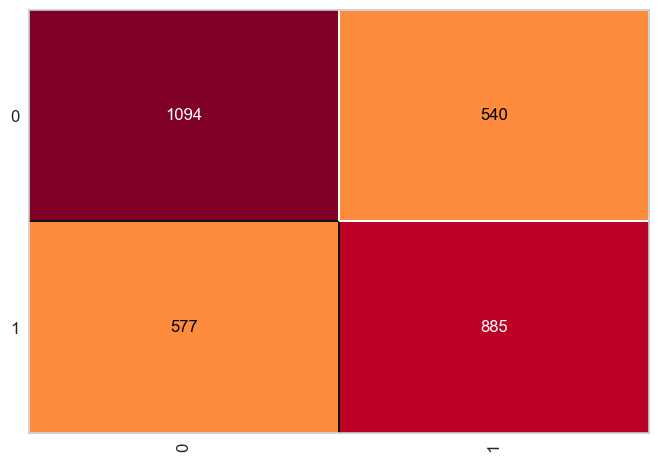

In [106]:
# Create a ConfusionMatrix visualizer for the balanced Random Forest classifier on test data
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

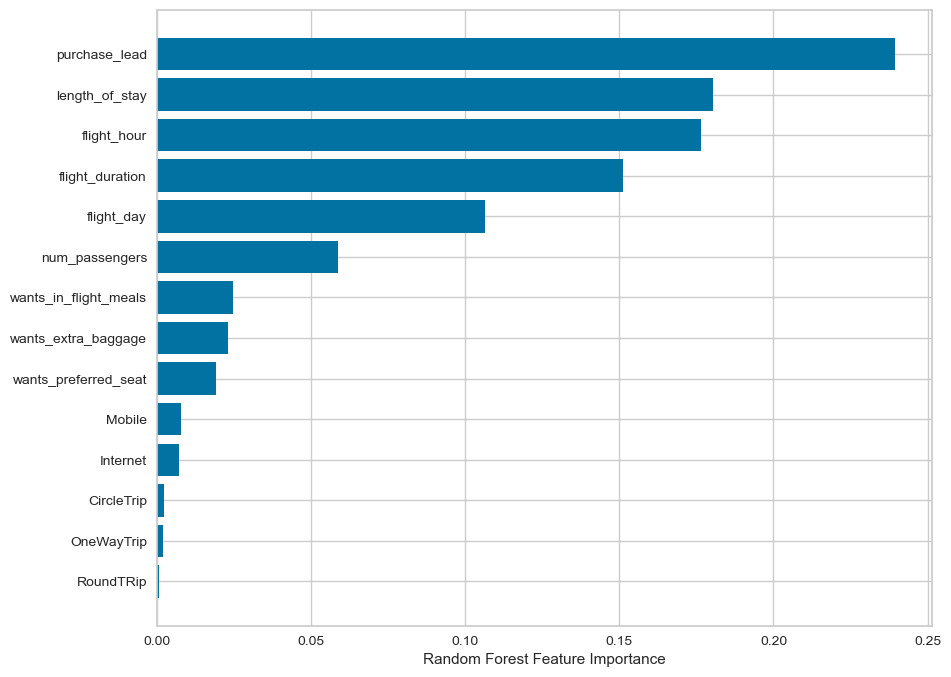

In [107]:
# Plot feature importances from the balanced Random Forest model
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")